In [1]:
"""
Pre-processing of the original dataset

Original source.. http://www.ai.mit.edu/courses/6.899/lectures/faces.tar.gz
"""

import os
import numpy as np
from matplotlib import pyplot as plt

In [2]:
dirlist = os.listdir('../facedata/')
HEIGHT = 19
WIDTH = 19

In [3]:
# Load PGM data

def openimage(fname):
    f = open(fname,'rb')
    pgmf = f
    
    # Ignore the first few lines .. meta information
    pgmf.readline() 
    pgmf.readline()
    pgmf.readline()
    
    # I know the height and width
    height = 19
    width = 19
    """Return a raster of integers from a PGM as a list of lists."""
    #assert pgmf.readline() == 'P5\n'
    #(width, height) = [int(i) for i in pgmf.readline().split()]
    #depth = int(pgmf.readline())
    #assert depth <= 255

    raster = []
    for y in range(height):
        row = []
        for y in range(width):
            row.append(float(ord(pgmf.read(1))))
        raster.append(row)
    
    f.close()
    
    return raster

In [4]:
def normalizeclip(vec):
    """
    Normalize vector so that the sd = 0.25, mean = 0.0
    Then Shift it to mean = 0.5
    Then clip it at [0,1]
    Necessary to clip because this is NMF
    """
    
    m = np.mean(vec)
    s = np.std(vec)
    l = vec.shape[0]
    
    # Zero mean, 0.25 standard deviation
    vec -= m * np.ones(vec.shape)
    vec *= 0.25 / s
    
    # Shift it to have mean 0.5
    vec += 0.5 * np.ones(vec.shape)
    
    # Clip at values [0,1]
    vec = np.clip(vec,a_min = 0.0, a_max = 1.0)
    
    return vec

In [5]:
def printvector(vec,dimensions):
    img_mat = np.reshape(vec,dimensions)
    plt.imshow(img_mat,cmap='gray')
    return

In [6]:
nImg = len(dirlist)
imgmat = np.zeros((HEIGHT*WIDTH,nImg))

In [7]:
for idx,fname in enumerate(dirlist):
    raster = openimage('../facedata/' + fname)
    flatraster = np.reshape(np.array(raster),(HEIGHT*WIDTH,))
    flatraster = normalizeclip(flatraster)
    imgmat[:,idx] = flatraster

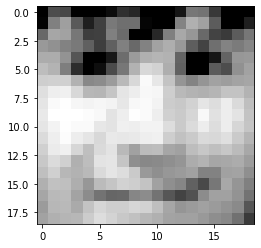

In [8]:
printvector(imgmat[:,1000],(HEIGHT,WIDTH))

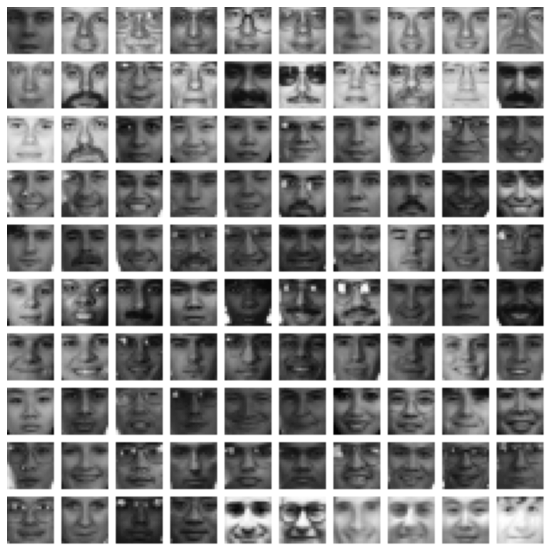

In [16]:
nRows = 10
nCols = 10
embeddim = 22

muralarray = np.ones((embeddim*nCols,embeddim*nRows))*256

c = 0
for i in range(nRows):
    for j in range(nCols):
        c+= 10
        fname = dirlist[c]
        raster = openimage('../facedata/' + fname)
        Img_square = np.array(raster)
        
        #Img_square = np.zeros((HEIGHT,WIDTH))
        muralarray[i*embeddim:i*embeddim+HEIGHT,j*embeddim:j*embeddim+WIDTH] = Img_square
        
        
#muralarray = np.ones(muralarray.shape) - muralarray
plt.figure(figsize=(10,10))
plt.imshow(muralarray,cmap='gray')
plt.axis('off')
plt.savefig('faces_sample.png')